In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
DATA_DIR = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())), "data/"
)
structure_names = ["Ge-1_Se-1", "Ge-1_Te-1", "Ge-1_Sb-1", "Si-1_C-1"]
df_column = pd.concat([pd.read_csv(os.path.join(DATA_DIR, f"{struct_name}_column.csv"), index_col=0) for struct_name in structure_names])
df_atomic = pd.concat([pd.read_csv(os.path.join(DATA_DIR, f"{struct_name}_atomic.csv"), index_col=0) for struct_name in structure_names])

In [3]:
cols_raw_column = list(df_column.columns)
cols_raw_atomic = list(df_atomic.columns)
cols_trash = ['converged', 'accuracy']
cols_independent = ['delta_E']
cols_drop = cols_trash + cols_independent

cols_dependent_column = cols_raw_column.copy()
cols_dependent_atomic = cols_raw_atomic.copy()
for element in cols_drop:
    cols_dependent_column.remove(element)
    cols_dependent_atomic.remove(element)

In [4]:
X_raw_column = df_column[cols_dependent_column]
X_raw_atomic = df_atomic[cols_dependent_atomic]
y_raw = df_column[cols_independent]

In [5]:
X_raw_column.describe()

,ecutrho,k_density,ecutwfc,PTC1,PTC2,PTC3,PTC4,PTC5,PTC6,PTC7,...,PTC9,PTC10,PTC11,PTC12,PTC13,PTC14,PTC15,PTC16,PTC17,PTC18
count,2547.000000,2547.000000,2547.000000,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,...,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.000000,2547.000000,2547.0,2547.0
mean,243.133098,0.229433,57.764036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.130153,0.242442,0.0,0.0
std,89.762272,0.145587,23.596846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.219444,0.249935,0.0,0.0
min,100.000000,0.100000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.0
25%,180.000000,0.125000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.0
50%,260.000000,0.166667,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.0
75%,340.000000,0.250000,75.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.500000,0.500000,0.0,0.0
max,380.000000,0.500000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.500000,0.500000,0.0,0.0


In [6]:
X_raw_atomic.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Ti,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr
count,2547.000000,2547.000000,2547.000000,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,...,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0,2547.0
mean,243.133098,0.229433,57.764036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,89.762272,0.145587,23.596846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.000000,0.100000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,180.000000,0.125000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,260.000000,0.166667,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,340.000000,0.250000,75.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,380.000000,0.500000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-7-806168f35d98>:3: RuntimeWarning: divide by zero encountered in log
  ax[i].scatter(X_raw_column[col], np.log(y_raw - np.min(y_raw)))


Text(0.5, 0, 'ecutwfc')

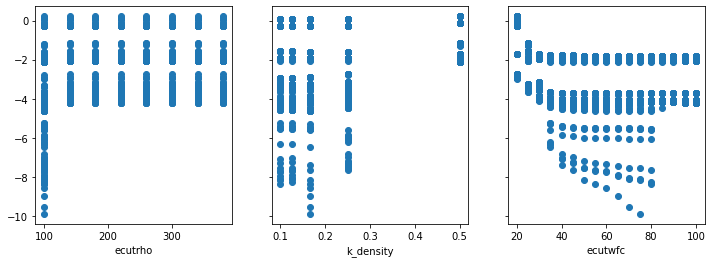

In [7]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
for i, col in enumerate(X_raw_column.columns[:3]):
    ax[i].scatter(X_raw_column[col], np.log(y_raw - np.min(y_raw)))
ax[0].set_xlabel("ecutrho")
ax[1].set_xlabel('k_density')
ax[2].set_xlabel('ecutwfc')


In [8]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw_column['ecutwfc'], X_raw_column['k_density'], np.log(y_raw - np.min(y_raw)))
ax.set_xlabel('ecutwfc')
ax.set_ylabel('k_density')
ax.set_zlabel('∆E')

<IPython.core.display.Javascript object>

<ipython-input-8-873c6ecffd7d>:4: RuntimeWarning: divide by zero encountered in log
  ax.scatter(X_raw_column['ecutwfc'], X_raw_column['k_density'], np.log(y_raw - np.min(y_raw)))


Text(0.5, 0, '∆E')

# Check if there are duplicates

In [9]:
# count nb of duplicated rows in X_raw_column
print(f"{X_raw_column.duplicated(keep=False).sum()}/{len(X_raw_column)} duplicated rows in X_raw_column")

1148/2547 duplicated rows in X_raw_column


In [10]:
# count nb of duplicated rows in X_raw_atomic
print(f"{X_raw_atomic.duplicated(keep=False).sum()}/{len(X_raw_atomic)} duplicated rows in X_raw_atomic")

0/2547 duplicated rows in X_raw_atomic


In [11]:
np.where((X_raw_column.iloc[0] == X_raw_column.iloc[:]).sum(axis=1) == len(X_raw_column.columns))[0]

array([  0, 661])

In [12]:
y_raw.iloc[0]

delta_E    0.872583
Name: 0, dtype: float64

In [13]:
y_raw.iloc[661]

delta_E    0.856145
Name: 0, dtype: float64

In the column encoding, the rows 0 and 661 are the same, but the delta_E values are different.

In [14]:
duplicated_rows_value = []
for i in range(len(df_column)):
    a = np.where((X_raw_column.iloc[i] == X_raw_column.iloc[:]).sum(axis=1) == len(X_raw_column.columns))[0]
    if len(a) > 1 and np.all(a >= i):
        duplicated_rows_value.append((float(y_raw.iloc[a[0]]), float(y_raw.iloc[a[1]])))

In [15]:
# print the maximal absolute difference between the two delta_E values of duplicated rows
abs_diff = np.abs(np.array(duplicated_rows_value) - np.array(duplicated_rows_value)[:,::-1])
print(f"maximal absolute difference between the two delta_E values of duplicated rows: {np.max(abs_diff)}")
print(f"mean absolute difference between the two delta_E values of duplicated rows: {np.mean(abs_diff)}")
print(f"median: {np.median(abs_diff)}")
print(f"std: {np.std(abs_diff)}")

maximal absolute difference between the two delta_E values of duplicated rows: 0.022705709999996826
mean absolute difference between the two delta_E values of duplicated rows: 0.002538285731691779
median: 0.0016047749999756888
std: 0.003119510038843177


In [16]:
# print the maximal relative absolute difference between the two delta_E values of duplicated rows
rel_diff = np.divide(np.abs(np.array(duplicated_rows_value) - np.array(duplicated_rows_value)[:,::-1]), np.array(duplicated_rows_value), where=np.array(duplicated_rows_value) != 0)
print(f"maximal relative absolute difference between the two delta_E values of duplicated rows: {np.max(rel_diff)}")
print(f"mean relative absolute difference between the two delta_E values of duplicated rows: {np.mean(rel_diff)}")
print(f"median: {np.median(rel_diff)}")
print(f"std: {np.std(rel_diff)}")

maximal relative absolute difference between the two delta_E values of duplicated rows: 275.45567472222774
mean relative absolute difference between the two delta_E values of duplicated rows: 2.5533543123160243
median: 0.2534871682214753
std: 20.26024317837187


While the maximal absolute difference of delta_E values between two duplicate rows is not so high (0.023), the maximal relative difference is quite high (275).